# Sprint15課題 ディープラーニングフレームワーク2

In [207]:
#ライブラリ
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python.keras import layers
from tensorflow.python.keras import models
from tensorflow.python.keras import optimizers
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


## 【問題1】公式Exampleを分担して実行
TensorFLowの公式Exampleを分担して実行してください。

以下の中から1人ひとつ選び実行し、その結果を簡単に発表してください。

**research**

定番のモデルから最新のモデルまで多様なコードが公開されています。

[models/research at master · tensorflow/models](https://github.com/tensorflow/models/tree/master/research)

**tutorials**

TensorFLowのチュートリアルとして用意された簡単なモデルが含まれています。

[models/tutorials at master · tensorflow/models](https://github.com/tensorflow/models/tree/master/tutorials)

### 選択モデル
- Overfitting and underfitting  
https://www.tensorflow.org/tutorials/keras/overfit_and_underfit


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [3]:
#numpy 1.16.1から1.16.3になる際にallow_pickle=Falseがデフォルトになったため
#numpyのバージョンを1.16.3→1.16.1に落とす必要がある。

#!pip install numpy==1.16.1
print(np.__version__)

1.16.1


### IMDBデータセットのダウンロード

In [4]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 形状が (len(sequences), dimension)ですべて0の行列を作る
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # 特定のインデックスに対してresults[i] を１に設定する
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

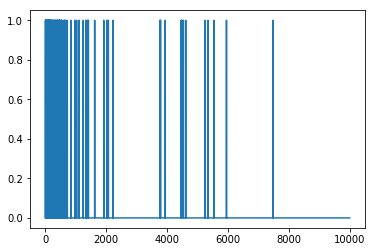

In [5]:
plt.plot(train_data[0])

### 過学習のデモンストレーション

#### base modelを作る

In [6]:
baseline_model = keras.Sequential([
    # `.summary` を見るために`input_shape`が必要
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 9s - loss: 0.4859 - acc: 0.8062 - binary_crossentropy: 0.4859 - val_loss: 0.3388 - val_acc: 0.8751 - val_binary_crossentropy: 0.3388
Epoch 2/20
 - 8s - loss: 0.2503 - acc: 0.9125 - binary_crossentropy: 0.2503 - val_loss: 0.2849 - val_acc: 0.8881 - val_binary_crossentropy: 0.2849
Epoch 3/20
 - 6s - loss: 0.1814 - acc: 0.9357 - binary_crossentropy: 0.1814 - val_loss: 0.2934 - val_acc: 0.8832 - val_binary_crossentropy: 0.2934
Epoch 4/20
 - 5s - loss: 0.1466 - acc: 0.9500 - binary_crossentropy: 0.1466 - val_loss: 0.3286 - val_acc: 0.8734 - val_binary_crossentropy: 0.3286
Epoch 5/20
 - 5s - loss: 0.1208 - acc: 0.9597 - binary_crossentropy: 0.1208 - val_loss: 0.3423 - val_acc: 0.8739 - val_binary_crossentropy: 0.3423
Epoch 6/20
 - 8s - loss: 0.0998 - acc: 0.9688 - binary_crossentropy: 0.0998 - val_loss: 0.3737 - val_acc: 0.8706 - val_binary_crossentropy: 0.3737
Epoch 7/20
 - 8s - l

#### smaller modelの構築

In [8]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [9]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.6063 - acc: 0.7471 - binary_crossentropy: 0.6063 - val_loss: 0.5000 - val_acc: 0.8500 - val_binary_crossentropy: 0.5000
Epoch 2/20
 - 6s - loss: 0.3830 - acc: 0.8878 - binary_crossentropy: 0.3830 - val_loss: 0.3443 - val_acc: 0.8814 - val_binary_crossentropy: 0.3443
Epoch 3/20
 - 4s - loss: 0.2635 - acc: 0.9179 - binary_crossentropy: 0.2635 - val_loss: 0.2988 - val_acc: 0.8883 - val_binary_crossentropy: 0.2988
Epoch 4/20
 - 5s - loss: 0.2111 - acc: 0.9326 - binary_crossentropy: 0.2111 - val_loss: 0.2860 - val_acc: 0.8880 - val_binary_crossentropy: 0.2860
Epoch 5/20
 - 5s - loss: 0.1802 - acc: 0.9420 - binary_crossentropy: 0.1802 - val_loss: 0.2849 - val_acc: 0.8870 - val_binary_crossentropy: 0.2849
Epoch 6/20
 - 6s - loss: 0.1586 - acc: 0.9497 - binary_crossentropy: 0.1586 - val_loss: 0.2900 - val_acc: 0.8846 - val_binary_crossentropy: 0.2900
Epoch 7/20
 - 5s - loss: 0.1405 - acc: 0.9572 - binary_crossentropy:

#### bigger modelの構築

In [10]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [11]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 22s - loss: 0.3425 - acc: 0.8545 - binary_crossentropy: 0.3425 - val_loss: 0.3046 - val_acc: 0.8752 - val_binary_crossentropy: 0.3046
Epoch 2/20
 - 23s - loss: 0.1414 - acc: 0.9488 - binary_crossentropy: 0.1414 - val_loss: 0.3328 - val_acc: 0.8736 - val_binary_crossentropy: 0.3328
Epoch 3/20
 - 23s - loss: 0.0444 - acc: 0.9868 - binary_crossentropy: 0.0444 - val_loss: 0.4505 - val_acc: 0.8684 - val_binary_crossentropy: 0.4505
Epoch 4/20
 - 25s - loss: 0.0062 - acc: 0.9989 - binary_crossentropy: 0.0062 - val_loss: 0.6059 - val_acc: 0.8670 - val_binary_crossentropy: 0.6059
Epoch 5/20
 - 22s - loss: 8.1541e-04 - acc: 1.0000 - binary_crossentropy: 8.1541e-04 - val_loss: 0.7000 - val_acc: 0.8666 - val_binary_crossentropy: 0.7000
Epoch 6/20
 - 22s - loss: 6.5697e-04 - acc: 1.0000 - binary_crossentropy: 6.5697e-04 - val_loss: 0.7219 - val_acc: 0.8693 - val_binary_crossentropy: 0.7219
Epoch 7/20
 - 22s - loss: 1.4529e-04 - acc: 1.

#### 訓練時と検証時の損失をグラフにする

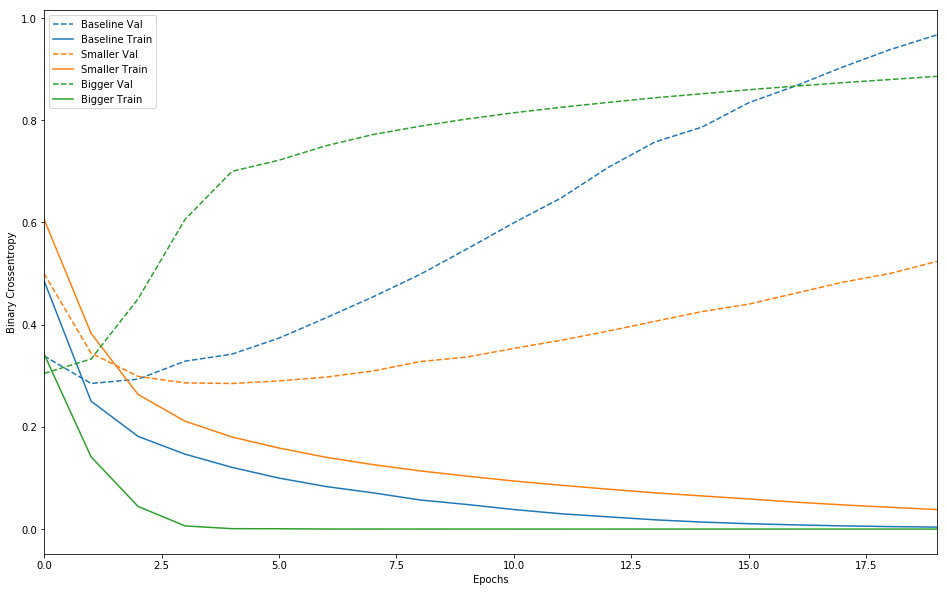

In [12]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

    plt.xlim([0, max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

bigger modelでは、1エポックで過学習が始まり、その度合いも強いことが確認できる。ネットワークの容量が大きいほど、訓練用データをモデル化するスピードが速くなるが、過学習しやすくなる。

### Strategies

#### 重みの正則化(weight regulation)を加える

過学習を緩和するための一般的な手法として、重みが小さい値を取ることで重み値の分布が整然(正則)となるように制約を与える。これを重みの正則化と呼ばれる。  
重みの大きさに関連するコストには２つの種類がある。

- L1正則化  
重み係数の絶対値に比例するコストを加える

- L2正則化  
重み係数の二乗に比例するコストを加える

tf.kerasでは、重みの正則化をするために、重み正則化のインスタンスをキーワード引数としてそうに加える。

In [13]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 9s - loss: 0.5074 - acc: 0.8153 - binary_crossentropy: 0.4661 - val_loss: 0.3675 - val_acc: 0.8776 - val_binary_crossentropy: 0.3229
Epoch 2/20
 - 8s - loss: 0.2938 - acc: 0.9095 - binary_crossentropy: 0.2444 - val_loss: 0.3370 - val_acc: 0.8867 - val_binary_crossentropy: 0.2843
Epoch 3/20
 - 7s - loss: 0.2458 - acc: 0.9324 - binary_crossentropy: 0.1905 - val_loss: 0.3444 - val_acc: 0.8852 - val_binary_crossentropy: 0.2873
Epoch 4/20
 - 6s - loss: 0.2258 - acc: 0.9414 - binary_crossentropy: 0.1668 - val_loss: 0.3667 - val_acc: 0.8768 - val_binary_crossentropy: 0.3062
Epoch 5/20
 - 5s - loss: 0.2111 - acc: 0.9493 - binary_crossentropy: 0.1495 - val_loss: 0.3780 - val_acc: 0.8759 - val_binary_crossentropy: 0.3154
Epoch 6/20
 - 5s - loss: 0.2003 - acc: 0.9542 - binary_crossentropy: 0.1367 - val_loss: 0.3930 - val_acc: 0.8732 - val_binary_crossentropy: 0.3287
Epoch 7/20
 - 6s - loss: 0.1942 - acc: 0.9562 - binary_crossentropy:

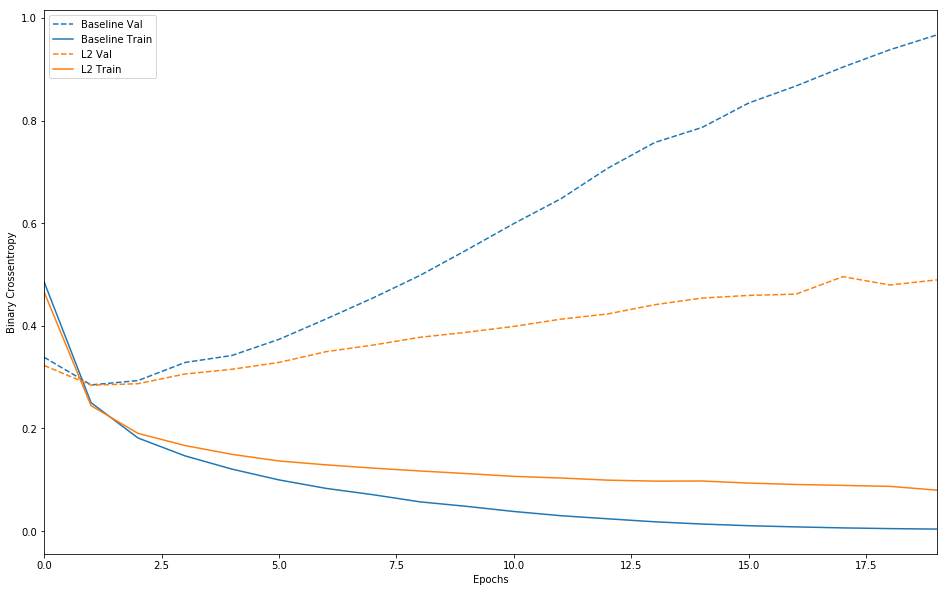

In [14]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

l2(0.001)というのは、層の重み行列の係数全てのに対して「0.001 * 重み係数の値 ** 2」を損失合計に加えることを意味する。
上記の通り、l2正則化ありのモデルは比較基準のモデルに比べて過学習しにくくになっている。

#### ドロップアウトを追加する

ドロップアウトは、ニューラルネットワークの正則化テクニックとして最もよく使われる手法。ドロップアウトは層に適用するもので、訓練時に層から出力された特徴量に対してランダムに「ドロップアウト（つまりゼロ化）」を行うものである。例えば、ある層が訓練時にある入力サンプルに対して、普通は[0.2, 0.5, 1.3, 0.8, 1.1] というベクトルを出力するとする。ここでドロップアウトを適用すると、このベクトルは例えば[0, 0.5, 1.3, 0, 1.1]のようにランダムに散らばったいくつかのゼロを含むようになる。「ドロップアウト率」はゼロ化される特徴の割合で、通常は0.2から0.5の間に設定する。テスト時は、どのユニットもドロップアウトされず、代わりに出力値がドロップアウト率と同じ比率でスケールダウンされる。これは、訓練時に比べてたくさんのユニットがアクティブであることに対してバランスをとるためである。

tf.kerasでは、Dropout層を使ってドロップアウトをネットワークに導入可能。ドロップアウト層は、その直前の層の出力に対してドロップアウトを適用する。

In [15]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 7s - loss: 0.6368 - acc: 0.6250 - binary_crossentropy: 0.6368 - val_loss: 0.4988 - val_acc: 0.8534 - val_binary_crossentropy: 0.4988
Epoch 2/20
 - 6s - loss: 0.4872 - acc: 0.7690 - binary_crossentropy: 0.4872 - val_loss: 0.3657 - val_acc: 0.8813 - val_binary_crossentropy: 0.3657
Epoch 3/20
 - 5s - loss: 0.3798 - acc: 0.8471 - binary_crossentropy: 0.3798 - val_loss: 0.3013 - val_acc: 0.8863 - val_binary_crossentropy: 0.3013
Epoch 4/20
 - 6s - loss: 0.3098 - acc: 0.8934 - binary_crossentropy: 0.3098 - val_loss: 0.2734 - val_acc: 0.8911 - val_binary_crossentropy: 0.2734
Epoch 5/20
 - 7s - loss: 0.2596 - acc: 0.9158 - binary_crossentropy: 0.2596 - val_loss: 0.2706 - val_acc: 0.8903 - val_binary_crossentropy: 0.2706
Epoch 6/20
 - 7s - loss: 0.2184 - acc: 0.9281 - binary_crossentropy: 0.2184 - val_loss: 0.2785 - val

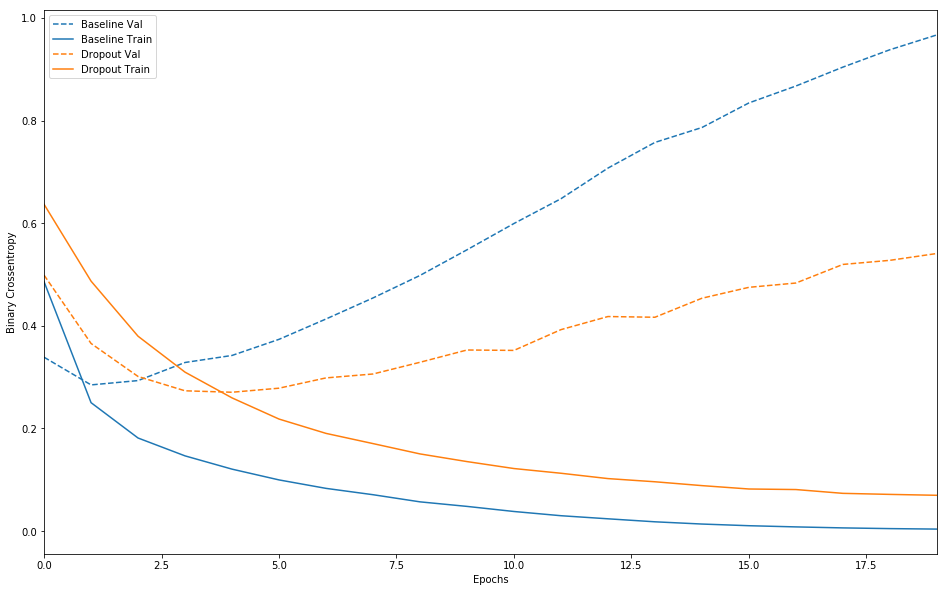

In [16]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

## 【問題2】Iris（2値分類）をKerasで学習
Sprint14で作成したIrisデータセットに対する2値分類をKerasに書き換えてください。

In [17]:
# データセットの読み込み
dataset_path = "Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor") |
        (df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm",
               "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y == 'Iris-versicolor'] = 0
y[y == 'Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=0)


In [18]:
#モデルの定義
model2 = models.Sequential()
model2.add(layers.Dense(50, activation='relu', input_shape=(4,)))
model2.add(layers.Dense(100, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 50)                250       
_________________________________________________________________
dense_16 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 5,451
Trainable params: 5,451
Non-trainable params: 0
_________________________________________________________________


In [20]:
#モデルのコンパイル
model2.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [21]:
#モデルの学習
history = model2.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=10, 
    validation_data=(X_val, y_val))

Train on 64 samples, validate on 16 samples
Epoch 1/10
64/64 [==============================] - 1s 10ms/sample - loss: 0.7208 - acc: 0.5312 - val_loss: 0.6884 - val_acc: 0.3750
Epoch 2/10
64/64 [==============================] - 0s 497us/sample - loss: 0.6633 - acc: 0.5938 - val_loss: 0.6251 - val_acc: 0.8125
Epoch 3/10
64/64 [==============================] - 0s 488us/sample - loss: 0.6279 - acc: 0.7656 - val_loss: 0.6452 - val_acc: 0.4375
Epoch 4/10
64/64 [==============================] - 0s 476us/sample - loss: 0.5921 - acc: 0.5625 - val_loss: 0.6260 - val_acc: 0.4375
Epoch 5/10
64/64 [==============================] - 0s 409us/sample - loss: 0.5739 - acc: 0.8125 - val_loss: 0.5666 - val_acc: 0.9375
Epoch 6/10
64/64 [==============================] - 0s 376us/sample - loss: 0.5486 - acc: 0.9062 - val_loss: 0.5687 - val_acc: 0.7500
Epoch 7/10
64/64 [==============================] - 0s 342us/sample - loss: 0.5233 - acc: 0.8594 - val_loss: 0.5440 - val_acc: 0.8125
Epoch 8/10
64/64 [=

In [22]:
y_pred_proba = model2.predict(X_train)[:, 0]

# 確率を0, 1に変換
y_pred = np.where(y_pred_proba >0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

y_pred_proba [0.71321386 0.41730833 0.65616643 0.38068193 0.68679905 0.4954
 0.39014587 0.47202536 0.7391943  0.7052245  0.3782349  0.6153983
 0.43298686 0.5489451  0.6172418  0.3768617  0.5201214  0.66141504
 0.3816927  0.7747123  0.75302315 0.4628295  0.59717584 0.7320779
 0.7851143  0.54376316 0.71068674 0.3625421  0.72125286 0.7382962
 0.6874473  0.69511104 0.5049065  0.66428727 0.49333066 0.81665444
 0.77670574 0.37144864 0.39581752 0.5518111  0.3039437  0.599324
 0.6284075  0.30219078 0.3877772  0.4598455  0.80004835 0.9020587
 0.34834236 0.39462158 0.37395927 0.7580732  0.6943424  0.8473884
 0.75842696 0.6738312  0.41228253 0.731475   0.61532795 0.72030675
 0.45617616 0.48444957 0.7500058  0.65858483]
y_pred [1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1]


In [23]:
#モデルの評価
scores = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.4951624274253845
Test accuracy: 0.8


## 【問題3】Iris（多値分類）をKerasで学習
Sprint14で作成したIrisデータセットに対する3値分類をKerasに書き換えてください。



In [24]:
def onehot(y):
    """
    多クラス分類を行う際のone-hot表現に変換

    Parameters
    ----------
    y : 次の形のndarray, shape (n_samples, )
        サンプル

    Returns
    -------
    y_one_hot : 次の形のndarray, shape (n_samples, n_classes)
        推定結果
    """
    enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
    y_one_hot = enc.fit_transform(y[:, np.newaxis])

    return y_one_hot

In [25]:
# データセットの読み込み
dataset_path = "Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm",
               "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y == 'Iris-versicolor'] = 0
y[y == 'Iris-virginica'] = 1
y[y == 'Iris-setosa'] = 2  # 追加
y = y.astype(np.int)[:, np.newaxis]

# 多クラス分類のため、ワンホットエンコーディングする
y = onehot(y.reshape(-1))

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=0)


In [26]:
#モデルの定義
model3 = models.Sequential()
model3.add(layers.Dense(50, activation='relu', input_shape=(4,)))
model3.add(layers.Dense(100, activation='relu'))
model3.add(layers.Dense(3, activation='softmax'))

In [27]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 50)                250       
_________________________________________________________________
dense_19 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 303       
Total params: 5,653
Trainable params: 5,653
Non-trainable params: 0
_________________________________________________________________


In [28]:
#モデルのコンパイル
model3.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [29]:
#モデルの学習
histroty = model3.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=10, 
    validation_data=(X_val, y_val))

Train on 96 samples, validate on 24 samples
Epoch 1/10
96/96 [==============================] - 1s 6ms/sample - loss: 1.3432 - acc: 0.2708 - val_loss: 0.9726 - val_acc: 0.3750
Epoch 2/10
96/96 [==============================] - 0s 338us/sample - loss: 0.9383 - acc: 0.3646 - val_loss: 0.8497 - val_acc: 0.3750
Epoch 3/10
96/96 [==============================] - 0s 338us/sample - loss: 0.7707 - acc: 0.6250 - val_loss: 0.7107 - val_acc: 0.7083
Epoch 4/10
96/96 [==============================] - 0s 312us/sample - loss: 0.6958 - acc: 0.6979 - val_loss: 0.6352 - val_acc: 0.7083
Epoch 5/10
96/96 [==============================] - 0s 349us/sample - loss: 0.5865 - acc: 0.8229 - val_loss: 0.5745 - val_acc: 0.7917
Epoch 6/10
96/96 [==============================] - 0s 318us/sample - loss: 0.5325 - acc: 0.8646 - val_loss: 0.5248 - val_acc: 0.7083
Epoch 7/10
96/96 [==============================] - 0s 333us/sample - loss: 0.4856 - acc: 0.7812 - val_loss: 0.4858 - val_acc: 0.7917
Epoch 8/10
96/96 [==

In [31]:
#モデルの評価
scores = model3.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model3.metrics_names[1], scores[1] * 100))

30/30 [==============================] - 0s 112us/sample - loss: 0.3802 - acc: 0.9333
acc: 93.33%


## 【問題4】House PricesをKerasで学習
Sprint14で作成したHouse Pricesデータセットに対する回帰をKerasに書き換えてください。

In [150]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [161]:
# 目的変数、説明変数の抽出
X = df.loc[:, ['GrLivArea', 'YearBuilt']].values
y = df.loc[:, 'SalePrice'].values

#対数変換
X = np.log(X)
y = np.log(y)

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=0)

In [162]:
#モデルの定義
model4 = models.Sequential()
model4.add(layers.Dense(50, activation='relu', input_shape=(2,)))
model4.add(layers.Dense(100, activation='relu'))
model4.add(layers.Dense(1))

In [163]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 50)                150       
_________________________________________________________________
dense_28 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 101       
Total params: 5,351
Trainable params: 5,351
Non-trainable params: 0
_________________________________________________________________


In [164]:
#モデルのコンパイル
model4.compile(loss='mse',
             optimizer='rmsprop',
             metrics=['mae'])

In [165]:
#モデルの学習
model4.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=10, 
    validation_data=(X_val, y_val))

Train on 934 samples, validate on 234 samples
Epoch 1/10
934/934 [==============================] - 1s 648us/sample - loss: 11.9143 - mean_absolute_error: 1.8022 - val_loss: 0.0795 - val_mean_absolute_error: 0.2233
Epoch 2/10
934/934 [==============================] - 0s 234us/sample - loss: 0.1364 - mean_absolute_error: 0.2950 - val_loss: 0.1538 - val_mean_absolute_error: 0.3034
Epoch 3/10
934/934 [==============================] - 0s 235us/sample - loss: 0.1314 - mean_absolute_error: 0.2898 - val_loss: 0.0740 - val_mean_absolute_error: 0.2124
Epoch 4/10
934/934 [==============================] - 0s 224us/sample - loss: 0.1419 - mean_absolute_error: 0.2962 - val_loss: 0.0723 - val_mean_absolute_error: 0.2105
Epoch 5/10
934/934 [==============================] - 0s 236us/sample - loss: 0.1342 - mean_absolute_error: 0.2944 - val_loss: 0.0776 - val_mean_absolute_error: 0.2067
Epoch 6/10
934/934 [==============================] - 0s 224us/sample - loss: 0.1230 - mean_absolute_error: 0.276

## 【問題5】MNISTをKerasで学習
Sprint14で作成したMNISTデータセットによる画像の多値分類をKerasに書き換えてください。

In [38]:
# mnistデータを読み込み
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [39]:
# (n_samples, n_channels, height, width)のNCHW
X_train = X_train.reshape(60000, 1, 28, 28)
X_test = X_test.reshape(10000, 1, 28, 28)

In [40]:
# float型へ
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)

# 正規化
X_train /= 255
X_test /= 255
print(X_train.max())  # 1.0
print(X_train.min())  # 0.0

# 平滑化
X_train = X_train.reshape(-1, 1*28*28)
X_test = X_test.reshape(-1, 1*28*28)

1.0
0.0


In [41]:
# データ分割
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2)
print(X_train.shape)
print(X_val.shape)


# ワンホット
y_train = onehot(y_train.reshape(-1))
y_val = onehot(y_val.reshape(-1))
y_test = onehot(y_test.reshape(-1))

(48000, 784)
(12000, 784)


In [42]:
#モデルの定義
model5 = models.Sequential()
model5.add(layers.Dense(50, activation='relu', input_shape=(X_train.shape[1],)))
model5.add(layers.Dense(100, activation='relu'))
model5.add(layers.Dense(10, activation='softmax'))

In [43]:
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_25 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1010      
Total params: 45,360
Trainable params: 45,360
Non-trainable params: 0
_________________________________________________________________


In [44]:
#モデルのコンパイル
model5.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [45]:
#モデルの学習
model5.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=10, 
    validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 17s 350us/sample - loss: 0.2659 - acc: 0.9210 - val_loss: 0.1609 - val_acc: 0.9512
Epoch 2/10
48000/48000 [==============================] - 17s 344us/sample - loss: 0.1279 - acc: 0.9610 - val_loss: 0.1472 - val_acc: 0.9584
Epoch 3/10
48000/48000 [==============================] - 16s 326us/sample - loss: 0.0962 - acc: 0.9705 - val_loss: 0.1371 - val_acc: 0.9598
Epoch 4/10
48000/48000 [==============================] - 14s 297us/sample - loss: 0.0762 - acc: 0.9758 - val_loss: 0.1227 - val_acc: 0.9661
Epoch 5/10
48000/48000 [==============================] - 14s 296us/sample - loss: 0.0638 - acc: 0.9797 - val_loss: 0.1152 - val_acc: 0.9695
Epoch 6/10
48000/48000 [==============================] - 14s 294us/sample - loss: 0.0529 - acc: 0.9826 - val_loss: 0.1162 - val_acc: 0.9697
Epoch 7/10
48000/48000 [==============================] - 14s 299us/sample - loss: 0.0475 - acc: 0.9846 

In [46]:
#モデルの評価
scores = model5.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model5.metrics_names[1], scores[1] * 100))

10000/10000 [==============================] - 0s 45us/sample - loss: 0.1162 - acc: 0.9726
acc: 97.26%


## 【問題6】（アドバンス課題）PyTorchへの書き換え
4種類の問題をPyTorchに書き換えてください。

In [47]:
# PyTorchのインポート
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
print(torch.__version__)

1.1.0


### 1. Iris（2値分類）

In [140]:
# データセットの読み込み
dataset_path = "Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor") |
        (df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm",
               "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y == 'Iris-versicolor'] = 0
y[y == 'Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=0)


In [141]:
#データをtensorに変換
#Variableで包んであげると、 どのような計算を辿ってその値になったのかを、
#変数自体が覚えておいてくれる。この後、backwardで微分する。
x = Variable(torch.from_numpy(X_train).float(), requires_grad=True)
y = Variable(torch.from_numpy(y_train).float())

In [142]:
class Net(nn.Module):
    
    def __init__(self):
        #スーパークラスのインスタンスメソッドを呼び出す
        super(Net, self).__init__()
        #レイヤーの生成
        self.fc1 = nn.Linear(4,10)
        self.fc2 = nn.Linear(10, 8)
        self.fc3 = nn.Linear(8, 1)
        
    def forward(self, x):
        #活性化関数
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [143]:
#インスタンス生成
net = Net()

#最適化手法
optimizer = optim.SGD(net.parameters(), lr=0.01)

#損失関数
criterion = nn.MSELoss()

#損失記録用
loss_list = np.array([])

for i in range(1000):
    #勾配の初期化
    optimizer.zero_grad()
    
    #順伝播
    output = net(x)
    
    #損失計算
    loss = criterion(output, y)
    
    #損失の記録
    loss_list = np.append(loss_list, float(loss))
    
    #勾配の計算
    loss.backward()
    
    #パラメータの更新
    optimizer.step()

#テストデータから予測確率を算出
outputs = net(Variable(torch.from_numpy(X_test).float()))

#予測確率から予測値をだす
predicted = torch.where(outputs>=0.5, torch.ones(1), torch.zeros(1))

#numpy形式に戻す
y_predicted = predicted.numpy()

#精度の算出
accuracy = np.sum(y_predicted == y_test) / len(y_predicted)
print('accuracy: {:.3f}'.format(accuracy))

accuracy: 0.900


<function matplotlib.pyplot.show(*args, **kw)>

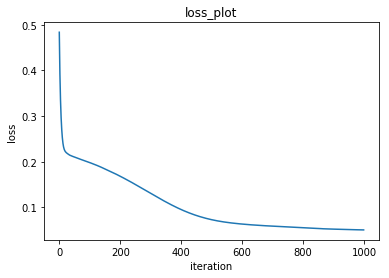

In [144]:
#lossの推移をグラフ
plt.plot(loss_list)

plt.title('loss_plot')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.show

### 2. Iris（多値分類）

In [145]:
# データセットの読み込み
dataset_path = "Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm",
               "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y == 'Iris-versicolor'] = 0
y[y == 'Iris-virginica'] = 1
y[y == 'Iris-setosa'] = 2  # 追加
y = y.astype(np.int)[:, np.newaxis]

# 多クラス分類のため、ワンホットエンコーディングする
y = onehot(y.reshape(-1))

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=0)

In [146]:
x = Variable(torch.from_numpy(X_train).float(), requires_grad=True)
y = Variable(torch.from_numpy(y_train).float())

In [147]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4,10)
        self.fc2 = nn.Linear(10, 8)
        self.fc3 = nn.Linear(8, 3)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [148]:
net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.1)
criterion = nn.MSELoss()

loss_list = np.array([])
for i in range(1000):
    #勾配の初期化
    optimizer.zero_grad()
    
    #順伝播
    output = net(x)
    
    #損失計算
    loss = criterion(output, y)
    
    #損失の記録
    loss_list = np.append(loss_list, float(loss))
    
    #勾配の計算
    loss.backward()
    
    #パラメータの更新
    optimizer.step()
    
outputs = net(Variable(torch.from_numpy(X_test).float()))
_, predicted = torch.max(outputs.data, 1)
y_predicted = predicted.numpy()
y_true = np.argmax(y_test, axis=1)
accuracy = np.sum(y_predicted == y_true) / len(y_predicted)
print('accuracy: {:.3f}'.format(accuracy))

accuracy: 1.000


<function matplotlib.pyplot.show(*args, **kw)>

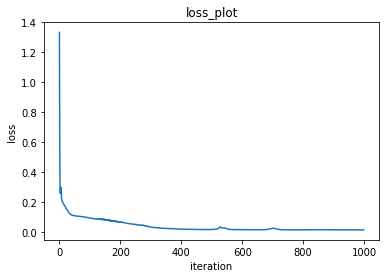

In [149]:
#lossの推移をグラフ
plt.plot(loss_list)

plt.title('loss_plot')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.show

### 3. House Prices

In [219]:
# 目的変数、説明変数の抽出
X = df.loc[:, ['GrLivArea', 'YearBuilt']].values
y = df.loc[:, 'SalePrice'].values

#対数変換
X = np.log(X)
y = np.log(y.reshape(-1, 1))

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=0)

In [220]:
x = Variable(torch.from_numpy(X_train).float(), requires_grad=True)
y = Variable(torch.from_numpy(y_train).float())

In [221]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,10)
        self.fc2 = nn.Linear(10, 8)
        self.fc3 = nn.Linear(8, 1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [224]:
net = Net()
optimizer = optim.Adam(net.parameters(), lr=0.1)
criterion = nn.MSELoss()

loss_list = np.array([])
for i in range(100):
    #勾配の初期化
    optimizer.zero_grad()
    
    #順伝播
    output = net(x)
    
    #損失計算
    loss = criterion(output, y)
    
    #損失の記録
    loss_list = np.append(loss_list, float(loss))
    
    #勾配の計算
    loss.backward()
    
    #パラメータの更新
    optimizer.step()
    
#テストデータから予測確率を算出
outputs = net(Variable(torch.from_numpy(X_test).float()))

#numpyに変換
y_pred = outputs.data.numpy()

#精度の算出
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)  
print('RMSE: {:.3f}'.format(rmse))
print('R2: {:.3f}'.format(r2))

RMSE: 0.268
R2: 0.525


<function matplotlib.pyplot.show(*args, **kw)>

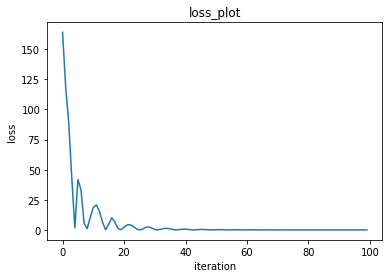

In [225]:
#lossの推移をグラフ
plt.plot(loss_list)

plt.title('loss_plot')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.show

### 4. MNISTデータ

In [226]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

In [227]:
mnist_data = MNIST('~/tmp/mnist', train=True, download=True, transform=transforms.ToTensor())
data_loader = DataLoader(mnist_data,batch_size=4,shuffle=False)



0it [00:00, ?it/s]

 99%|█████████▉| 9854976/9912422 [00:30<00:00, 439457.14it/s]

Extracting /Users/yusuke-saruya/tmp/mnist/MNIST/raw/train-images-idx3-ubyte.gz



0it [00:00, ?it/s]


 57%|█████▋    | 16384/28881 [00:00<00:00, 96264.37it/s]
32768it [00:00, 62609.62it/s]                           
0it [00:00, ?it/s]

Extracting /Users/yusuke-saruya/tmp/mnist/MNIST/raw/train-labels-idx1-ubyte.gz



 98%|█████████▊| 1622016/1648877 [00:05<00:00, 329319.79it/s]
1654784it [00:05, 283880.69it/s]                             
0it [00:00, ?it/s]

Extracting /Users/yusuke-saruya/tmp/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz



  0%|          | 0/4542 [00:00<?, ?it/s]
8192it [00:00, 22947.87it/s]            

Extracting /Users/yusuke-saruya/tmp/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [257]:
data_iterator = iter(data_loader)
images, labels = data_iterator.next()

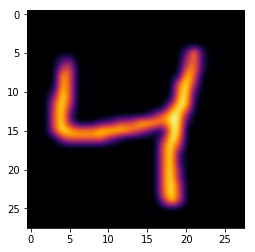

ラベル: tensor(4)


In [259]:
data = images[2].numpy()
plt.imshow(data.reshape(28, 28), cmap='inferno', interpolation='bicubic')
plt.show()
print('ラベル:', labels[2])

In [230]:
# 学習データ
train_data_with_label = MNIST('~/tmp/mnist', train=True, download=True, transform=transforms.ToTensor())
train_data_loader = DataLoader(train_data_with_label,batch_size=4,shuffle=True)
# 検証データ
test_data_with_label = MNIST('~/tmp/mnist', train=False, download=True, transform=transforms.ToTensor())
test_data_loader = DataLoader(test_data_with_label,batch_size=4,shuffle=False)

In [231]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        #入力層から中間層（隠れ層）
        self.l1 = nn.Linear(28 * 28, 50)
        # 中間層（隠れ層）から出力層
        self.l2 = nn.Linear(50, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.l1(x)
        x = self.l2(x)
        return x

In [243]:
model = MLP()

import torch.optim as optimizer

# ソフトマックスロスエントロピー
criterion = nn.CrossEntropyLoss()
# SGD
optimizer = optimizer.SGD(model.parameters(), lr=0.1)

In [244]:
# 最大学習回数
MAX_EPOCH=4

for epoch in range(MAX_EPOCH):
    running_loss = 0.0
    for i, data in enumerate(train_data_loader):
    
        # dataから学習対象データと教師ラベルデータを取り出す
        train_data, teacher_labels = data

        # 入力をtorch.autograd.Variableに変換
        train_data, teacher_labels = Variable(train_data), Variable(teacher_labels)

        # 計算された勾配情報を削除
        optimizer.zero_grad()

        # モデルでの予測を計算
        outputs = model(train_data)

        # lossとwによる微分計算
        loss = criterion(outputs, teacher_labels)
        loss.backward()

        # 勾配を更新
        optimizer.step()

        # 損失の累計
        running_loss += loss.data

        # 2000ミニバッチずつ、進捗を表示
        if i % 2000 == 1999:
            print('学習進捗：[%d, %d]　学習損失（loss）: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        
print('学習終了')

学習進捗：[1, 2000]　学習損失（loss）: 0.703
学習進捗：[1, 4000]　学習損失（loss）: 0.690
学習進捗：[1, 6000]　学習損失（loss）: 0.664
学習進捗：[1, 8000]　学習損失（loss）: 0.725
学習進捗：[1, 10000]　学習損失（loss）: 0.673
学習進捗：[1, 12000]　学習損失（loss）: 0.722
学習進捗：[1, 14000]　学習損失（loss）: 0.691
学習進捗：[2, 2000]　学習損失（loss）: 0.731
学習進捗：[2, 4000]　学習損失（loss）: 0.721
学習進捗：[2, 6000]　学習損失（loss）: 0.718
学習進捗：[2, 8000]　学習損失（loss）: 0.766
学習進捗：[2, 10000]　学習損失（loss）: 0.721
学習進捗：[2, 12000]　学習損失（loss）: 0.720
学習進捗：[2, 14000]　学習損失（loss）: 0.733
学習進捗：[3, 2000]　学習損失（loss）: 0.723
学習進捗：[3, 4000]　学習損失（loss）: 0.845
学習進捗：[3, 6000]　学習損失（loss）: 0.833
学習進捗：[3, 8000]　学習損失（loss）: 0.760
学習進捗：[3, 10000]　学習損失（loss）: 0.766
学習進捗：[3, 12000]　学習損失（loss）: 0.826
学習進捗：[3, 14000]　学習損失（loss）: 0.793
学習進捗：[4, 2000]　学習損失（loss）: 0.774
学習進捗：[4, 4000]　学習損失（loss）: 0.809
学習進捗：[4, 6000]　学習損失（loss）: 0.798
学習進捗：[4, 8000]　学習損失（loss）: 0.867
学習進捗：[4, 10000]　学習損失（loss）: 0.839
学習進捗：[4, 12000]　学習損失（loss）: 0.821
学習進捗：[4, 14000]　学習損失（loss）: 0.791
学習終了


In [238]:
count_when_correct = 0
total = 0
#
for data in test_data_loader:
  #
  test_data, teacher_labels = data
  #
  results = model(Variable(test_data))
  #
  _, predicted = torch.max(results.data, 1)
  #
  total += teacher_labels.size(0)
  count_when_correct += (predicted == teacher_labels).sum()
    
print('正解率：%d / %d = %f'% (count_when_correct, total, int(count_when_correct)/int(total)))

正解率：9204 / 10000 = 0.920400


ラベル： tensor(6)


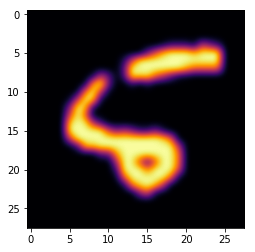

In [241]:
test_iterator = iter(test_data_loader)
# ここで回数を増減して、違うテストデータを取り出せます
test_data, labels = test_iterator.next()
test_data, labels = test_iterator.next()
test_data, labels = test_iterator.next()
#
results = model(Variable(test_data))
_, predicted_label = torch.max(results.data, 1)

plt.imshow(test_data [0].numpy().reshape(28, 28), cmap='inferno', interpolation='bicubic')
print('ラベル：', predicted_label[0])



## 【問題7】（アドバンス課題）フレームワークの比較
それぞれのフレームワークにはどのような違いがあるかをまとめてください。

興味がある場合はTensorFlow、Keras、PyTorch以外にも触れてみましょう。

**視点例**

- 計算速度
- コードの行数・可読性
- 用意されている機能

- TensorFlow
    - 基本的な計算処理の記述が可能なため、細かい調整もできる
    - 利用者数が多く、コミュニティが大きい
    - 計算グラフ構築後の変更が不可能
    - 実装は難しい
    
    
- Keras
    - コーディング・実装が容易
    - 処理の中身がブラックボックス
    
    
- Chainer
    - 柔軟な計算グラフの構築が可能
    - 端的にコーディングが可能(Caffe上のコード2,058行がChainerでは167行)
    - 国内では利用されている場面もあるが、国外ではあまり見かけられない
    - 計算速度が遅くなりがち
    
    
- PyTorch
    - コミュニティ拡大中
    - Chainerのメリットのほとんどを有する
    - 研究用途であると宣言されている
    - Python系では最速
    
    
- Caffe
    - 計算速度は非常に速い
    - 実装には習熟が必要となる


